In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
from scipy import stats
import pingouin as pg
from numpy.random import seed
from numpy.random import randn
import seaborn as sns
from scipy.stats import norm
from matplotlib import pyplot
from scipy.stats import shapiro
from scipy.stats import f
import pingouin as pg
from statsmodels.multivariate.manova import MANOVA
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from numpy import mean
from numpy import std

In [2]:
# 11 Subjects: 1,2,4,5,6,10,15,7,9,11,13

SleepStage=['REM Control','REM Scent','Light Sleep Control','Light Sleep Scent','Deep Sleep Control','Deep Sleep Scent']
barWidth = 0.25

# read the file
df= pd.read_csv("../../../Data/Physiological_Data/Processed_Data/Fitbit/Sleep_Stage_Data/sleep_duration_all.csv")


In [3]:
subject = []
REM = []
DeepSleep = []
LightSleep = []
Condition = []
Order = []
Gender = []
Total_duration = []
Duration_category = [] #category 1: less than 5 hours, 2: 5-6 hours, 3: 6-7 hours, 4: 7-8 hours, 5: more than 8 hours

def set_category(time):
    category = 0
    if time < 300:
        category = 1
    elif time < 360:
        category = 2
    elif time < 420:
        category = 3
    elif time < 480:
        category = 4
    else:
        category = 5
        
    return category

for i in range(len(df)):

    subject.append(df['Subject ID'][i])
    subject.append(df['Subject ID'][i])
    REM.append(df[SleepStage[0]][i])
    REM.append(df[SleepStage[1]][i])
    LightSleep.append(df[SleepStage[2]][i])
    LightSleep.append(df[SleepStage[3]][i])
    DeepSleep.append(df[SleepStage[4]][i])
    DeepSleep.append(df[SleepStage[5]][i])
    Condition.append('Control')
    Condition.append('Scent')
    Order.append(df['Order'][i])
    Order.append(df['Order'][i])
    Gender.append(df['Gender'][i])
    Gender.append(df['Gender'][i])
    control_duration = df[SleepStage[0]][i]+df[SleepStage[2]][i]+df[SleepStage[4]][i]
    scent_duration = df[SleepStage[1]][i]+df[SleepStage[3]][i]+df[SleepStage[5]][i]
    Total_duration.append(control_duration)
    Total_duration.append(scent_duration)
    Duration_category.append(set_category(control_duration))
    Duration_category.append(set_category(scent_duration))
    
data = {'Subject ID': subject, 'REM':REM, 'Light_Sleep':LightSleep, 'Deep_Sleep':DeepSleep, 'Order':Order, 'Condition':Condition, 'Gender':Gender, 'Total_Duration':Total_duration, 'Sleep_category':Duration_category } 

df2 = pd.DataFrame(data) 
print(df2)

    Subject ID  REM  Light_Sleep  Deep_Sleep  Order Condition Gender  \
0           18   47          388          90      1   Control      F   
1           18   88          271          93      1     Scent      F   
2           20   72          227          92      1   Control      M   
3           20   62          246          63      1     Scent      M   
4           22  101          215         111      1   Control      F   
5           22   80          207          76      1     Scent      F   
6            1   77          154          47      1   Control      M   
7            1  113          216          91      1     Scent      M   
8            2  100          281          88      1   Control      M   
9            2   67          251          57      1     Scent      M   
10           4   84          121          71      1   Control      F   
11           4   85          188         117      1     Scent      F   
12           5  131          179          68      1   Control   

# Plot of different sleep stages

In [4]:
Primary_stages = ["REM", "Light_Sleep", "Deep_Sleep"]

0.27787763090100237
0.21013888940956085
0.032485057600335786


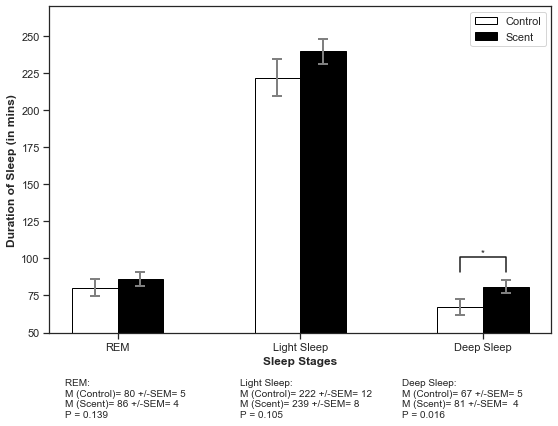

In [6]:
# find mean and sem of each column
MeanControlStages=[]
MeanScentStages=[]

SemControlStages=[]
SemScentStages=[]

c=0
for i in SleepStage:
    mean_of_column=st.mean(df[i])
    sem_of_column=stats.sem(df[i])
    if c%2==0:
        MeanControlStages.append(mean_of_column)
        SemControlStages.append(sem_of_column)
    else:
        MeanScentStages.append(mean_of_column)
        SemScentStages.append(sem_of_column)
    c+=1

# anova between control and scent, and plotting significance values
fig = plt.figure(figsize=[9,6])
Pvalues_of_columns=[]
for i in range(0,len(Primary_stages)):
#     Statistic,Pval=stats.ttest_rel(df2[SleepStage[i]],df[SleepStage[i+1]])
    aov = pg.mixed_anova(dv= Primary_stages[i], within='Condition', between='Order', subject='Subject ID', data=df2)
    Pval = aov['p-unc'][1]
    print(Pval)
    Pval=Pval/2
    Pvalues_of_columns.append(Pval)
    y, h, col = max(MeanControlStages[int(i)],MeanScentStages[int(i)]), 20, 'k' 
    star=''
    j=i*2
    if(Pval<0.0001):
        star="***"
    elif Pval<0.001:
        star="**"
    elif Pval<0.05:
        star="*"
    if Pval<0.05:  
        plt.text(j/2 + barWidth/2 , (y+h), star, ha='center', va='bottom', color=col)
        plt.plot([j/2, j/2, j/2+barWidth, j/2+barWidth], [y+h/2, y+(h), y+(h), y+h/2], lw=1.5, c=col)
# plot all the data


# Set position of bar on X axis
r1 = np.arange(len(MeanControlStages))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, MeanControlStages,yerr=SemControlStages, color='#ffffff', width=barWidth, edgecolor='black',capsize=5, label='Control',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))
plt.bar(r2, MeanScentStages,yerr=SemScentStages, color='#000000', width=barWidth, edgecolor='black',capsize=5, label='Scent',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))

# Add xticks on the middle of the group bars
plt.xlabel('Sleep Stages', fontweight='bold')
plt.ylabel('Duration of Sleep (in mins)', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(MeanControlStages))], ['REM','Light Sleep','Deep Sleep'])
plt.ylim([50,270])
txt1="REM: "+"\nM (Control)= "+str(int(MeanControlStages[0]))+" +/-SEM= "+str(int(SemControlStages[0]))+"\nM (Scent)= "+str(int(MeanScentStages[0]))+" +/-SEM= "+str(int(SemScentStages[0]))+"\nP = "+str('%.3f' % Pvalues_of_columns[0])
txt2="\nLight Sleep: "+"\nM (Control)= "+str(int(MeanControlStages[1]))+" +/-SEM= "+str(int(SemControlStages[1]))+"\nM (Scent)= "+str(int(MeanScentStages[1]))+" +/-SEM= "+str(int(SemScentStages[1]))+"\nP = "+str('%.3f' % Pvalues_of_columns[1])
txt3="\nDeep Sleep: "+"\nM (Control)= "+str(int(MeanControlStages[2]))+" +/-SEM= "+str(int(SemControlStages[2]))+"\nM (Scent)= "+str(int(MeanScentStages[2]))+" +/-SEM=  "+str(int(SemScentStages[2]))+"\nP = "+str('%.3f' % Pvalues_of_columns[2])


txt=txt1+txt2+txt3
fig.text(.15, -0.07, txt1, ha='left')
fig.text(.42, -0.07, txt2, ha='left')
fig.text(.67, -0.07, txt3, ha='left')


# Create legend & Show graphic
plt.legend()
plt.savefig("../../../Plots/Physiological_Plots/Fitbit/SleepStages/"+'Sleep_Stages',dpi=300,bbox_inches='tight')
plt.show()




# Normality Test

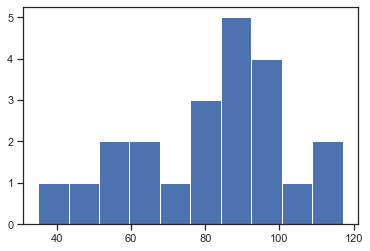

In [11]:
# histogram plot for deep sleep (control(SleepStage[4])/scent(SleepStage[5]))

# seed the random number generator
seed(1)
# generate univariate observations
data = df[SleepStage[5]]
# histogram plot
pyplot.hist(data)
pyplot.show()

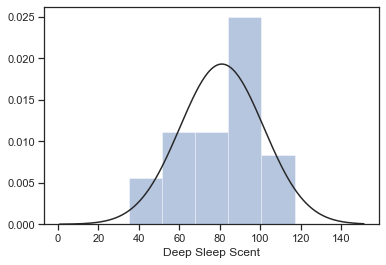

In [12]:
# deep sleep - control(SleepStage[4])/scent(SleepStage[5]))

data = df[SleepStage[5]]

sns.distplot(data, fit=norm, kde=False)
pyplot.show()

In [13]:
# Shapiro-Wilk Test

# seed the random number generator
seed(1)
# generate univariate observations
data = df[SleepStage[5]]
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')


Statistics=0.975, p=0.832
Sample looks Gaussian (fail to reject H0)


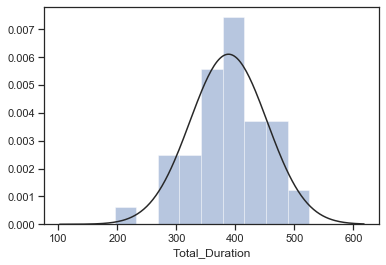

In [14]:
data = df2['Total_Duration']

sns.distplot(data, fit=norm, kde=False)
pyplot.show()

In [15]:
# Shapiro-Wilk Test

# seed the random number generator
seed(1)
# generate univariate observations
data = df2['Total_Duration']
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')



Statistics=0.974, p=0.413
Sample looks Gaussian (fail to reject H0)


[81.0, 53.63636363636363]
[78.9090909090909, 83.0909090909091]


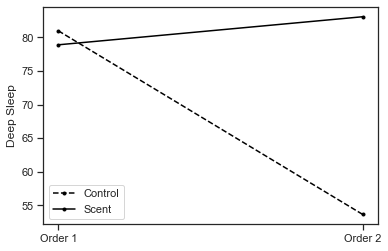

In [16]:
control_order = [df2[(df2.Order == 1) & (df2.Condition == 'Control')]['Deep_Sleep'].mean(), df2[(df2.Order == 2) & (df2.Condition == 'Control')]['Deep_Sleep'].mean()]
scent_order = [df2[(df2.Order == 1) & (df2.Condition == 'Scent')]['Deep_Sleep'].mean(), df2[(df2.Order == 2) & (df2.Condition == 'Scent')]['Deep_Sleep'].mean()]
print(control_order)
print(scent_order)

plt.plot(control_order,'--', marker = '.',color='black', label="Control")
plt.plot(scent_order, marker = '.',color ='black', label="Scent")
plt.ylabel('Deep Sleep')
plt.xticks([0,1],['Order 1', 'Order 2'])
plt.legend()
plt.savefig("../../../Plots/Physiological_Plots/Fitbit/SleepStages/"+'Interaction_Order&Condition',dpi=300,bbox_inches='tight')
plt.show()

# Tests for significance

## For Deep Sleep

In [17]:
# Compute the two-way mixed-design ANOVA - Dependent variable "Deep Sleep" and independemt variables - Condition (scent/control) and Order (O1/O2)
aov = pg.mixed_anova(dv='Deep_Sleep', within='Condition', between='Order', subject='Subject ID', data=df2)
# Pretty printing of ANOVA summary
pg.print_table(aov)
# two-tailed p values
print(np.mean(df2[df2.Order == 1]['Deep_Sleep']), np.mean(df2[df2.Order == 2]['Deep_Sleep']))


ANOVA SUMMARY

Source             SS    DF1    DF2        MS      F    p-unc    np2  eps
-----------  --------  -----  -----  --------  -----  -------  -----  -----
Order        1477.841      1     20  1477.841  2.749    0.113  0.121  -
Condition    2059.114      1     20  2059.114  5.281    0.032  0.209  1.0
Interaction  2736.568      1     20  2736.568  7.018    0.015  0.260  -

79.95454545454545 68.36363636363636


In [18]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='Deep_Sleep', within='Condition', between='Gender', subject='Subject ID', data=df2)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source             SS    DF1    DF2        MS      F    p-unc    np2  eps
-----------  --------  -----  -----  --------  -----  -------  -----  -----
Gender       2501.128      1     20  2501.128  5.141    0.035  0.204  -
Condition    2059.114      1     20  2059.114  3.967    0.060  0.166  1.0
Interaction   155.461      1     20   155.461  0.300    0.590  0.015  -



In [19]:
# Levene f test - b/w male and female for deep sleep
stats.levene(df2[df2.Gender=='M']['Deep_Sleep'], df2[df2.Gender=='F']['Deep_Sleep'])
# mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')

LeveneResult(statistic=0.10697243127902849, pvalue=0.7452422079430447)

In [20]:
stats.ttest_ind(df2[df2.Gender=='M']['Deep_Sleep'], df2[df2.Gender=='F']['Deep_Sleep'], axis=0, equal_var=True)

Ttest_indResult(statistic=-2.169198141836228, pvalue=0.03577705259088773)

In [21]:
model = ols('Deep_Sleep ~ C(Gender)*C(Condition)*C(Order)', df2).fit()

# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
model.summary()


Overall model F( 7, 36) =  2.943, p =  0.0152


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Deep_Sleep   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     2.943
Date:                Mon, 04 May 2020   Prob (F-statistic):             0.0152
Time:                        13:59:56   Log-Likelihood:                -191.86
No. Observations:                  44   AIC:                             399.7
Df Residuals:                      36   BIC:                             414.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             89.0000      8.550     10.409      0.000      71.660     106.340
C(Gender)[T.M]                                       -17.6000     12.682     -1.388      0.174     -43.320       8.120
C(Condition)[T.Scent]                                 -6.8333     12.092     -0.565      0.575     -31.356      17.689
C(Order)[T.2]                                        -26.1667     12.092     -2.164      0.037     -50.689      -1.644
C(Gender)[T.M]:C(Condition)[T.Scent]                  10.4333     17.935      0.582      0.564     -25.940      46.806
C(Gender)[T.M]:C(Order)[T.2]                          -2.6333     17.935     -0.147      0.884     -39.006      33.740
C(Condition)[T.Scent]:C(Order)[T.2]                   34.1667     17.100      1.998      0.053      -0.514      68.847
C(Gender)[T.M]:C(Condition)[T.Scent]:C(Order)[T.2]    -5.7667     25.363     -0.227      0.821     -57.206      45.673
==============================================================================
Omnibus:                        0.511   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.574
Skew:                          -0.234   Prob(JB):                        0.751
Kurtosis:                       2.693   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
mc = statsmodels.stats.multicomp.MultiComparison(df2['Deep_Sleep'], df2['Order'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2 -11.5909 0.1105 -25.9373 2.7555  False
----------------------------------------------------


In [23]:
mc = statsmodels.stats.multicomp.MultiComparison(df2['Deep_Sleep'], df2['Condition'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj  lower   upper  reject
----------------------------------------------------
Control  Scent  13.6818 0.058 -0.4849 27.8485  False
----------------------------------------------------


In [24]:
mc = statsmodels.stats.multicomp.MultiComparison(df2['Deep_Sleep'], df2['Gender'])
mc_results = mc.tukeyhsd()
print(mc_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     F      M -15.1417 0.0358 -29.2285 -1.0548   True
-----------------------------------------------------


## For Light sleep and REM

In [25]:
aov = pg.anova(dv='Light_Sleep', between='Order', data=df2)
# Pretty printing of ANOVA summary
pg.print_table(aov)
# two-tailed p values


ANOVA SUMMARY

Source      ddof1    ddof2      F    p-unc    np2
--------  -------  -------  -----  -------  -----
Order           1       42  0.052    0.821  0.001



In [26]:
aov = pg.anova(dv='REM', between='Order', data=df2)
# Pretty printing of ANOVA summary
pg.print_table(aov)
# two-tailed p values


ANOVA SUMMARY

Source      ddof1    ddof2      F    p-unc    np2
--------  -------  -------  -----  -------  -----
Order           1       42  0.012    0.914  0.000



## For total duration

In [27]:
# Compute the two-way mixed-design ANOVA - Dependent Variable: Total Duration and independemt variables - Condition (scent/control) and Order (O1/O2)
aov = pg.mixed_anova(dv='Total_Duration', within='Condition', between='Order', subject='Subject ID', data=df2)
# Pretty printing of ANOVA summary
pg.print_table(aov)



ANOVA SUMMARY

Source              SS    DF1    DF2         MS      F    p-unc    np2  eps
-----------  ---------  -----  -----  ---------  -----  -------  -----  -----
Order         2226.568      1     20   2226.568  0.563    0.462  0.027  -
Condition    15543.841      1     20  15543.841  3.753    0.067  0.158  1.0
Interaction   7938.205      1     20   7938.205  1.917    0.181  0.087  -



In [28]:
# paired t-test for total duration between control and scent
stats.ttest_rel(df2[df2.Condition == "Control"]["Total_Duration"],df2[df2.Condition == "Scent"]["Total_Duration"])

Ttest_relResult(statistic=-1.896339425359402, pvalue=0.07175780418773123)

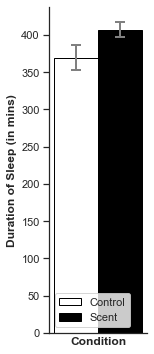

In [29]:
fig, ax = plt.subplots(1,1, sharex=True,figsize=[1.75,6])


a =ax
a.spines["top"].set_visible(False)
a.spines["right"].set_visible(False)
barWidth = 0.005
Pval = aov["p-unc"][0]/2
h= 30
y= max(df2[df2.Condition == "Control"]["Total_Duration"].mean(), df2[df2.Condition == "Scent"]["Total_Duration"].mean())
star=''
j=0
if(Pval<0.0001):
    star="***"
elif Pval<0.001:
    star="**"
elif Pval<0.05:
    star="*"
if Pval<0.05:  
    plt.text(j/2 + barWidth/2 , (y+h), star, ha='center', va='bottom', color=col)
    plt.plot([j/2, j/2, j/2+barWidth, j/2+barWidth], [y+h/2, y+(h), y+(h), y+h/2], lw=1.5, c=col)
# plot all the data


# Set position of bar on X axis
r1 = np.arange(1)
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, df2[df2.Condition == "Control"]["Total_Duration"].mean(),yerr=stats.sem(df2[df2.Condition == "Control"]["Total_Duration"]), color='#ffffff', width=barWidth, edgecolor='black',capsize=5, label='Control',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))
plt.bar(r2, df2[df2.Condition == "Scent"]["Total_Duration"].mean(),yerr=stats.sem(df2[df2.Condition == "Scent"]["Total_Duration"]), color='#000000', width=barWidth, edgecolor='black',capsize=5, label='Scent',error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))

# Add xticks on the middle of the group bars
plt.xlabel('Condition', fontweight='bold')
plt.ylabel('Duration of Sleep (in mins)', fontweight='bold')

# plt.ylim([300,450])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
# Create legend & Show graphic
plt.legend()
plt.savefig("../../../Plots/Physiological_Plots/Fitbit/SleepStages/"+'ConditionVsDuration',dpi=300,bbox_inches='tight')


plt.show()

In [30]:
model = ols('Total_Duration ~ C(Gender)*C(Condition)*C(Order)', df2).fit()

# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
model.summary()

Overall model F( 7, 36) =  1.191, p =  0.3325


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Total_Duration   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.191
Date:                Mon, 04 May 2020   Prob (F-statistic):              0.333
Time:                        14:00:00   Log-Likelihood:                -241.73
No. Observations:                  44   AIC:                             499.5
Df Residuals:                      36   BIC:                             513.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                            413.3333     26.558     15.564      0.000     359.472     467.195
C(Gender)[T.M]                                       -51.3333     39.391     -1.303      0.201    -131.222      28.556
C(Condition)[T.Scent]                                -18.0000     37.558     -0.479      0.635     -94.171      58.171
C(Order)[T.2]                                        -52.3333     37.558     -1.393      0.172    -128.505      23.838
C(Gender)[T.M]:C(Condition)[T.Scent]                  63.2000     55.708      1.134      0.264     -49.780     176.180
C(Gender)[T.M]:C(Order)[T.2]                          24.7333     55.708      0.444      0.660     -88.247     137.714
C(Condition)[T.Scent]:C(Order)[T.2]                   68.0000     53.115      1.280      0.209     -39.722     175.722
C(Gender)[T.M]:C(Condition)[T.Scent]:C(Order)[T.2]   -31.4000     78.782     -0.399      0.693    -191.178     128.378
==============================================================================
Omnibus:                        0.684   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.710   Jarque-Bera (JB):                0.533
Skew:                          -0.262   Prob(JB):                        0.766
Kurtosis:                       2.876   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
maov = MANOVA.from_formula('Deep_Sleep + Total_Duration  ~ Condition', data=df2)
print(maov.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0538 2.0000 41.0000 360.4814 0.0000
         Pillai's trace  0.9462 2.0000 41.0000 360.4814 0.0000
 Hotelling-Lawley trace 17.5845 2.0000 41.0000 360.4814 0.0000
    Roy's greatest root 17.5845 2.0000 41.0000 360.4814 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         Condition        Value  Num DF  Den DF F Value Pr > F
--------------------------------------------------------------
            Wilks' lambda 0.8969 2.0000 41.0000  2.3562 0.1075
           Pillai's trace 0.1031 2.0000 41.0000  2.3562 0.1075
   Hotellin